In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
print("Unique customers:", df["CustomerID"].nunique())

Unique customers: 4325


In [4]:
print("Unique products:", df["StockCode"].nunique())

Unique products: 3650


In [5]:
top_products = df['Description'].value_counts().head()

In [6]:
print(top_products)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1942
REGENCY CAKESTAND 3 TIER              1616
JUMBO BAG RED RETROSPOT               1575
ASSORTED COLOUR BIRD ORNAMENT         1369
PARTY BUNTING                         1358
Name: count, dtype: int64


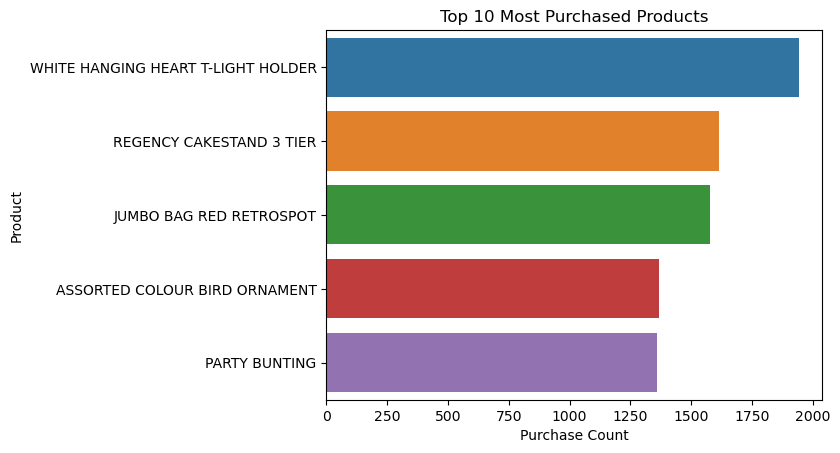

In [7]:
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("Product")
plt.show()

C:\Users\Jitendra Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


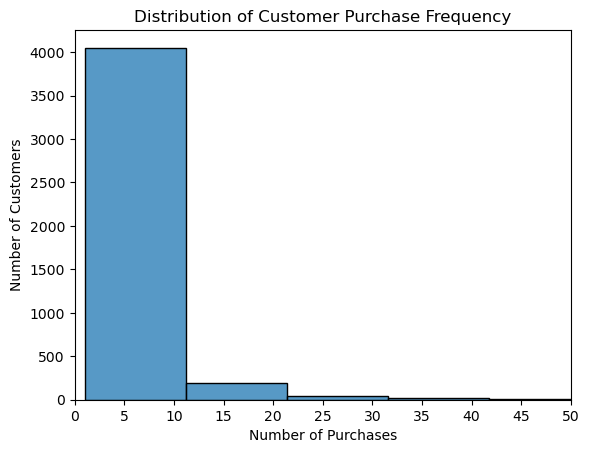

In [8]:
cust_freq = df.groupby("CustomerID")["InvoiceNo"].nunique()
sns.histplot(cust_freq, bins=20, kde=False)
plt.title("Distribution of Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")

# Focus on where most data is (probably 0-50)
plt.xlim(0, 50)
plt.xticks(range(0, 51, 5))  # Every 5 from 0 to 50

plt.show()

In [9]:
unique_purchases = df.groupby("CustomerID")["InvoiceNo"].nunique()

In [10]:
print("Purchase frequency statistics:")
print(f"Min purchases: {unique_purchases.min()}")
print(f"Max purchases: {unique_purchases.max()}")
print(f"Mean purchases: {unique_purchases.mean():.2f}")
print(f"Median purchases: {unique_purchases.median()}")
print(f"Total unique customers: {len(unique_purchases)}")

Purchase frequency statistics:
Min purchases: 1
Max purchases: 205
Mean purchases: 4.23
Median purchases: 2.0
Total unique customers: 4325


In [11]:
print("Quantity statistics:")
print(df['Quantity'].describe())

# Top 10 largest single item purchases
print("\nTop 10 largest single item purchases:")
top_quantities = df.nlargest(10, 'Quantity')[['InvoiceNo', 'CustomerID', 'Description', 'Quantity']]
print(top_quantities)

Quantity statistics:
count    382788.000000
mean         12.699102
std          42.040724
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        4800.000000
Name: Quantity, dtype: float64

Top 10 largest single item purchases:
        InvoiceNo  CustomerID                          Description  Quantity
297261     573008     12901.0    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800
138196     554868     13135.0                 SMALL POPCORN HOLDER      4300
59146      544612     18087.0                EMPIRE DESIGN ROSETTE      3906
182181     560599     14609.0  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186
306831     573995     16308.0          SMALL CHINESE STYLE SCISSOR      3000
3469       536830     16754.0    WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880
196948     562439     12931.0        ASSORTED COLOUR BIRD ORNAMENT      2880
134714     554272     12901.0   PACK OF 60 PINK PAISLEY CAKE CASES      2700
47710      543057     16333.0   

In [12]:
# Maximum quantity for any single product in one transaction line
max_single_item = df['Quantity'].max()
print(f"Highest quantity of a single item: {max_single_item}")

# See which transaction had this maximum
max_quantity_transaction = df[df['Quantity'] == max_single_item]
print("\nTransaction with highest single item quantity:")
print(max_quantity_transaction[['InvoiceNo', 'CustomerID', 'Description', 'Quantity']])

Highest quantity of a single item: 4800

Transaction with highest single item quantity:
        InvoiceNo  CustomerID                        Description  Quantity
297261     573008     12901.0  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800


In [13]:
print("=== CUSTOMER PURCHASE FREQUENCY ANALYSIS ===")
print(f"Total customers: {len(unique_purchases)}")
print(f"Purchase range: {unique_purchases.min()} to {unique_purchases.max()}")
print(f"Average purchases per customer: {unique_purchases.mean():.2f}")
print(f"Median purchases per customer: {unique_purchases.median()}")
print()

print("Top 10 most frequent customers:")
print(unique_purchases.nlargest(10))
print()

print("Distribution of purchase frequencies:")
freq_dist = unique_purchases.value_counts().sort_index().head(10)
print(freq_dist)

=== CUSTOMER PURCHASE FREQUENCY ANALYSIS ===
Total customers: 4325
Purchase range: 1 to 205
Average purchases per customer: 4.23
Median purchases per customer: 2.0

Top 10 most frequent customers:
CustomerID
12748.0    205
14911.0    192
17841.0    124
13089.0     93
14606.0     92
15311.0     90
12971.0     85
14646.0     73
13408.0     62
18102.0     60
Name: InvoiceNo, dtype: int64

Distribution of purchase frequencies:
InvoiceNo
1     1493
2      841
3      505
4      396
5      233
6      176
7      138
8       96
9       66
10      57
Name: count, dtype: int64


In [14]:
customer_summary = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",  # Number of purchases
    "Quantity": "sum",       # Total items bought
    "UnitPrice": "mean"      # Average price per item
}).round(2)

customer_summary.columns = ["NumPurchases", "TotalItems", "AvgPrice"]
print(customer_summary.head())

            NumPurchases  TotalItems  AvgPrice
CustomerID                                    
12347.0                7        2458      2.64
12348.0                4        1861      6.56
12349.0                1         631      8.29
12350.0                1         197      3.84
12352.0                6         395      7.15


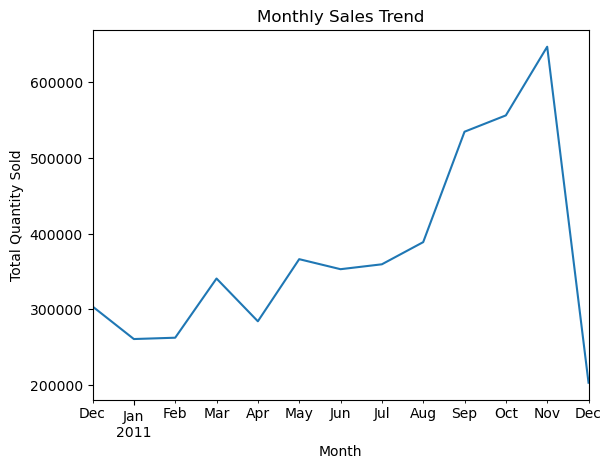

In [16]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
monthly_sales = df.set_index("InvoiceDate").resample("M")["Quantity"].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.show()

In [17]:
# Check what products drove November sales
nov_data = df[df['InvoiceDate'].dt.month == 11]
top_nov_products = nov_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top November products:")
print(top_nov_products)

# Check if it's driven by few large customers or many customers
nov_customers = nov_data['CustomerID'].nunique()
nov_avg_per_customer = nov_data.groupby('CustomerID')['Quantity'].sum().mean()
print(f"November: {nov_customers} unique customers, avg {nov_avg_per_customer:.0f} items per customer")

Top November products:
Description
RABBIT NIGHT LIGHT                     12256
POPCORN HOLDER                          8182
PAPER CHAIN KIT 50'S CHRISTMAS          5737
JUMBO BAG RED RETROSPOT                 5275
ASSORTED COLOUR BIRD ORNAMENT           5141
WOODEN STAR CHRISTMAS SCANDINAVIAN      4895
WHITE HANGING HEART T-LIGHT HOLDER      4842
WOODEN HEART CHRISTMAS SCANDINAVIAN     4520
WORLD WAR 2 GLIDERS ASSTD DESIGNS       4500
DISCO BALL CHRISTMAS DECORATION         4307
Name: Quantity, dtype: int64
November: 1656 unique customers, avg 391 items per customer


In [18]:
user_item_matrix = df.pivot_table(
    index="CustomerID", 
    columns="StockCode", 
    values="Quantity", 
    aggfunc="sum", 
    fill_value=0
)

print("User–Item matrix shape:", user_item_matrix.shape)
user_item_matrix.head()

User–Item matrix shape: (4325, 3650)


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [19]:
user_item_matrix.to_csv("user_item_matrix.csv")